In [1]:
from source.cellHandler import DDC
from source.auxiliary_functions import low_rank, apply_estimator
from sklearn.covariance import MinCovDet
import numpy as np

np.random.seed(0)

In [2]:
N = 10000
p = 100
r = 5
outlier_rate = 0.05

sigma, _ = low_rank(r, p)
X = np.random.multivariate_normal(np.zeros(p), sigma, size=N)

outliers = np.zeros(N)
outliers[:int(outlier_rate*N)]=1
np.random.shuffle(outliers)

X_bad = np.random.uniform(0, 4, size=(N,p))

outlier_mask = np.outer(outliers, np.ones(p))

X_contaminated = (1-outlier_mask)*X + outlier_mask*X_bad

In [3]:
ddc = DDC(X_contaminated,0.9).astype(int)

In [4]:
q = 0.05
n_contaminated = np.sum(ddc, axis=1)
worst_lines = np.argsort(n_contaminated)[-int(q*N):]
mask = np.zeros(N)
mask[worst_lines] = 1
mask = mask.astype(int)

In [5]:
n_contaminated[worst_lines]

array([56, 60, 60, 60, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
       65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66,
       66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66,
       66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67,
       67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67,
       67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70

In [6]:
mask.sum()

500

In [7]:
outliers.sum()

500.0

In [8]:
# True positive rate:
np.sum(mask*outliers)/np.sum(outliers)

1.0

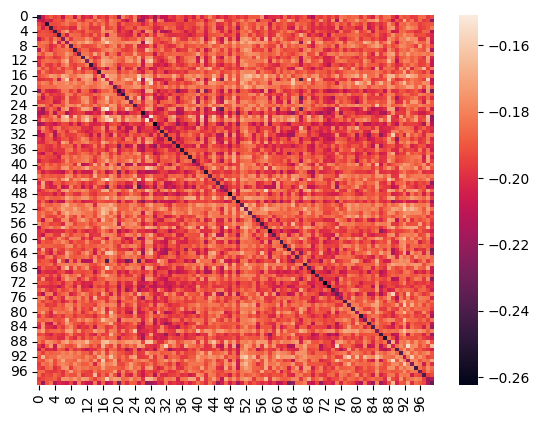

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(sigma - np.cov(X_contaminated.T))
plt.show()

In [10]:
X_cleaned = X_contaminated * np.outer(1-mask, np.ones(p))
X_cleaned = X_cleaned[~np.all(X_cleaned == 0, axis=1)]

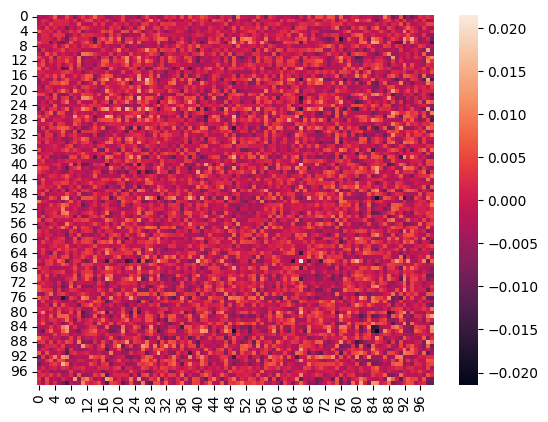

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(sigma- np.cov(X_cleaned.T))
plt.show()

In [13]:
# Estimation error w/out correction:
print("contaminated error: ", np.linalg.norm(sigma - np.cov(X_contaminated.T), ord=2))
# Estimation error w/out correction:
print("cleaned error     :", np.linalg.norm(sigma - np.cov(X_cleaned.T), ord=2))
# Estimation error without contamination :
print("estimation error  :", np.linalg.norm(sigma - np.cov(X.T), ord=2))
# Huber error:
a = MinCovDet().fit(X_contaminated)
print("with huber robust :", np.linalg.norm(sigma - a.covariance_, ord=2))

contaminated error:  19.061581391777445
cleaned error     : 0.24723721763362683
estimation error  : 0.23785628869684636
with huber robust : 0.2709380833568488


In [14]:
# Estimation error w/out correction:
print("contaminated error: ", np.linalg.norm(sigma - np.cov(X_contaminated.T)))
# Estimation error w/out correction:
print("cleaned error     :", np.linalg.norm(sigma - np.cov(X_cleaned.T)))
# Estimation error without contamination :
print("estimation error  :", np.linalg.norm(sigma - np.cov(X.T)))
# Huber error:
a = MinCovDet().fit(X_contaminated)
print("with huber robust :", np.linalg.norm(sigma - a.covariance_))

contaminated error:  19.08418832344146
cleaned error     : 0.44359620162772506
estimation error  : 0.43834085493969077
with huber robust : 0.4604210520530708
